# 
# COE59410- Generative Deep Learning

## Homework 2

> Imran A. Zualkernan

The purpose of this homework is to learn how adversarial autoencoders work. 

## Deliverables

**You need to upload the following on ilearn (2 items)**

1. The Jupyter notebook in its original format.

2. A PDF of the Jupyter notebook for grading.

*Please do not upload a zipped file.* Upload each file separately. Each question is worth 25 points.

Download and use the following code as your base. 

https://medium.com/@a.mirzaei69/adversarial-autoencoders-on-mnist-dataset-python-keras-implementation-5eeafd52ab21

* Q1. 
Implement adversarial autoencoders using convolutional layers for the following data set. 

https://www.kaggle.com/gpiosenka/100-bird-species

You may wish to select an appropriate subset of this data for your experiments. 

* Q2. Experiment with and determine the size of the latent space that provides the best results!

* Q3. Implement and compare all three schemes Original AAE, Semi-Supervised and Supervised!

## Group 2
* Huangjin Zhou, b00080932
* Eman Shaikh, G00086260
* Mueez Kan, b00068255


## Q1  Implement adversarial autoencoders using convolutional layers for the following data set. 


### training data
We download the birds data set and save training set at train folder

```python
train_dir='train/';
```

### subset
Then we load 3000 samples, which is about 1/10 of the whole data set, for the training.

```python
train_data=generator.flow_from_directory(train_dir, target_size=(width,width),batch_size=3000)
```

The reason why we didn't load the whole set was for one thing 1/10 would be enough for the training, the other was we use batch_on_train, which should load all the training data in memory, the whole data set was too much.

```python
            d_loss_real = self.discriminator.train_on_batch(latent_real, valid)
            d_loss_fake = self.discriminator.train_on_batch(latent_fake, fake)
```
### Parameters

```python
# epoch number
epochs=5000

# image width
width=128

img_rows = width
img_cols = width

### image chanel, red, green and blue
channels = 3

# input shape of encoder, also output shape of decoder
input_shape = (img_rows, img_cols, channels)
# training batch size
batch_size = 128
kernel_size = 3
filters = 64
latent_dim = 8
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [16, 32, 64]
```

### Conversion
Then we replace the dense layers of  encoder, decoder and discrminator with convolutional layers.


Note we need to make sure the input shape of encoder is the image shape and the output shape is the latent vector, decoder is opposite to the encoder.

The input shape of discriminator is also a latent vector, the same as decoder, but the output should be a binary category
```python
# encoder
        inputs = Input(shape=input_shape, name='encoder_input')
    encoder = Model(inputs, latent, name='encoder')
# decoder

        latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
        decoder = Model(latent_inputs, outputs, name='decoder')
# discriminator
      outputs = Dense(1, name='discriminator_output', activation='sigmoid', 
                        kernel_initializer=initializer, bias_initializer=initializer)(x)

        # instantiate discriminator model
        discriminator = Model(latent_inputs, outputs, name='discriminator')
```

To make sure the encoder and decoder match with eacher, we save the encoder' shape and recover in decoder

```python
# encoder
        self.shape = K.int_shape(x)
    
# decoder    
        shape = self.shape
        
        # build the decoder model
        latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
        x = Dense(shape[1]*shape[2]*shape[3])(latent_inputs)
        x = Reshape((shape[1], shape[2], shape[3]))(x)
    ```
 Also we use Conv2DTranspose to reflect Conv2D and UpSampling2D to refelct MaxPool2D

```python
#encoder
            x = Conv2D(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       activation='relu',
                       padding='same')(x)
            x = MaxPool2D()(x)
#decoder

            x = Conv2DTranspose(filters=filters,
                                kernel_size=kernel_size,
                                strides=2,
                                activation='relu',
                                padding='same')(x)
            x = UpSampling2D()(x)

```

### Optimization
Replace dense layers with convolutional layers won't make good outcome, so we made such optimization
1. layer number
We found 3 layers is the best
2. Batch normalization
With batch normalization, the adavatange between the two networks becomes small, which is good for competition
3. Max Pooling
The max pooling will extract more features 
4. Latent size
Will expain in Q2
5. Filter size
Combination of [16, 32, 64]


In [1]:
!mkdir -p images/Q1
!ls images/Q1

In [2]:
# -*- coding: utf-8 -*-
# Author : Ali Mirzaei
# Date : 19/09/2017


from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.initializers import RandomNormal
import numpy as np
import matplotlib
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import random
import math
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import BatchNormalization, Input, Dense, Dropout, Flatten, Activation,Concatenate,LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend, models
#import tensorflow_addons as tfa
import tensorflow as tf
print(tf.__version__)

# need to add these for the GPU
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

# import the image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.4.1


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:

#Setting the parameters for training

# batch size and image width to use
batch_size=128
width=128

# all the data directories
train_dir='train/';
test_dir='test/'
valid_dir='valid/';

# the number of epochs
num_epochs=10

# creating an image generator that will feed the data from
# each of the directories

# we use scaling transformation in this generator
generator=ImageDataGenerator(rescale=1./255)

# we specify the size of the input and batch size
# size of the input is necessary because the image
# needs to be rescaled for the neural network

train_data=generator.flow_from_directory(train_dir, target_size=(width,width),batch_size=3000)
valid_data=generator.flow_from_directory(valid_dir, target_size=(width,width),batch_size=1255)
test_data=generator.flow_from_directory(test_dir, target_size=(width,width),batch_size=1250)


x_train, y_train = train_data.next()
x_test, y_test = valid_data.next()
x_train.shape

import matplotlib.pyplot as plt
def show_image(x):
    plt.imshow(np.clip(x, 0, 1))

In [ ]:
initializer = RandomNormal(mean=0.0, stddev=0.01, seed=None)
from keras import backend as K

epochs=5000

img_rows = width
img_cols = width
channels = 3

# network parameters
input_shape = (img_rows, img_cols, channels)
batch_size = 128
kernel_size = 3
filters = 64
latent_dim = 8
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [16, 32, 64]


class AAN():
    def __init__(self, img_shape=input_shape, encoded_dim=latent_dim):
        
        self.encoded_dim = encoded_dim
        self.optimizer_reconst = Adam(0.01)
        self.optimizer_discriminator = Adam(0.01)
        self._initAndCompileFullModel(img_shape, encoded_dim)

    def _genEncoderModel(self, img_shape, encoded_dim):
        """ Build Encoder Model Based on Paper Configuration
        Args:
            img_shape (tuple) : shape of input image
            encoded_dim (int) : number of latent variables
        Return:
            A sequential keras model
        """
        
        input_shape = img_shape
        latent_dim = encoded_dim

        inputs = Input(shape=input_shape, name='encoder_input')
        x = inputs
        # stack of Conv2D(64)-Conv2D(128)-Conv2D(256)
        for filters in layer_filters:
            x = BatchNormalization()(x)
            x = Conv2D(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       activation='relu',
                       padding='same')(x)
            x = MaxPool2D()(x)

        # shape info needed to build decoder model so we don't do hand computation
        # the input to the decoder's first Conv2DTranspose will have this shape
        # shape is (4, 4, 256) which is processed by the decoder back to (32, 32, 3)
        self.shape = K.int_shape(x)

        # generate a latent vector
        x = Flatten()(x)
        x = BatchNormalization()(x)
        latent = Dense(latent_dim, name='latent_vector')(x)

        # instantiate encoder model
        encoder = Model(inputs, latent, name='encoder')
        encoder.summary()
        return encoder

    def _getDecoderModel(self, encoded_dim, img_shape):
        """ Build Decoder Model Based on Paper Configuration
        Args:
            encoded_dim (int) : number of latent variables
            img_shape (tuple) : shape of target images
        Return:
            A sequential keras model
        """
        
        latent_dim = encoded_dim
        shape = self.shape
        
        # build the decoder model
        latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
        x = Dense(shape[1]*shape[2]*shape[3])(latent_inputs)
        x = Reshape((shape[1], shape[2], shape[3]))(x)

#         x = BatchNormalization()(x)
        # stack of Conv2DTranspose(256)-Conv2DTranspose(128)-Conv2DTranspose(64)
        for filters in layer_filters[::-1]:
            x = BatchNormalization()(x)
            x = Conv2DTranspose(filters=filters,
                                kernel_size=kernel_size,
                                strides=2,
                                activation='relu',
                                padding='same')(x)
            x = UpSampling2D()(x)

        x = BatchNormalization()(x)
        outputs = Conv2DTranspose(filters=channels,
                                  kernel_size=kernel_size,
                                  activation='sigmoid',
                                  padding='same',
                                  name='decoder_output')(x)

        # instantiate decoder model
        decoder = Model(latent_inputs, outputs, name='decoder')
        decoder.summary()

        return decoder  

    def _getDescriminator(self, encoded_dim):
        """ Build Descriminator Model Based on Paper Configuration
        Args:
            encoded_dim (int) : number of latent variables
        Return:
            A sequential keras model
        """

        input_shape = encoded_dim
        shape = self.shape
        
        kernel_size = 5
        layer_filters = [32, 64, 128, 256]

        # build the decoder model
        latent_inputs = Input(shape=(latent_dim,), name='discriminator_input')
        x = Dense(shape[1]*shape[2]*shape[3], kernel_initializer=initializer,
                          bias_initializer=initializer)(latent_inputs)
        x = Reshape((shape[1], shape[2], shape[3]))(x)

        for filters in layer_filters:
            # first 3 convolution layers use strides = 2
            # last one uses strides = 1
            if filters == layer_filters[-1]:
                strides = 1
            else:
                strides = 2
            
            x = LeakyReLU(alpha=0.2)(x)
            x = Conv2D(filters=filters,
                       kernel_size=kernel_size,
                       strides=strides,
                       padding='same')(x)

        x = Flatten()(x)
        outputs = Dense(1, name='discriminator_output', activation='sigmoid', 
                        kernel_initializer=initializer, bias_initializer=initializer)(x)

        # instantiate discriminator model
        discriminator = Model(latent_inputs, outputs, name='discriminator')
        discriminator.summary()

        
        return discriminator  

    def _initAndCompileFullModel(self, img_shape, encoded_dim):
        self.encoder = self._genEncoderModel(img_shape, encoded_dim)
        self.decoder = self._getDecoderModel(encoded_dim, img_shape)
        self.discriminator = self._getDescriminator(encoded_dim)
        img = Input(shape=img_shape)
        encoded_repr = self.encoder(img)
        gen_img = self.decoder(encoded_repr)
        self.autoencoder = Model(img, gen_img)
        valid = self.discriminator(encoded_repr)
        self.encoder_discriminator = Model(img, valid)
        self.discriminator.compile(optimizer=self.optimizer_discriminator,
                                   loss='binary_crossentropy',
                                   metrics=['accuracy'])
        self.autoencoder.compile(optimizer=self.optimizer_reconst,
                                 loss ='mse')
        for layer in self.discriminator.layers:
            layer.trainable = False
        self.encoder_discriminator.compile(optimizer=self.optimizer_discriminator,
                                           loss='binary_crossentropy',
                                           metrics=['accuracy'])
    def imagegrid(self, epochnumber):
        fig = plt.figure(figsize=[width, width])
        images = self.generateImages(5)
        for index,img in enumerate(images):
            img = img.reshape((width,width,3))
            ax = fig.add_subplot(10, 10, index+1)
            ax.set_axis_off()
            ax.imshow(img)
        fig.savefig("images/Q1/"+str(epochnumber)+".png")
        plt.show()
        plt.close(fig)
    def generateImages(self, n=20):
        latents = 5*np.random.normal(size=(n, self.encoded_dim))
        imgs = self.decoder.predict(latents)
        return imgs

    def train(self, x_train, batch_size=batch_size, epochs=epochs, save_interval=100):
        half_batch = int(batch_size / 2)
        for epoch in range(epochs):
            #---------------Train Discriminator -------------
            # Select a random half batch of images
            idx = np.random.randint(0, x_train.shape[0], half_batch)
            imgs = x_train[idx]
            # Generate a half batch of new images
            latent_fake = self.encoder.predict(imgs)
            #gen_imgs = self.decoder.predict(latent_fake)
            latent_real = 5*np.random.normal(size=(half_batch, self.encoded_dim))
            valid = np.ones((half_batch, 1))
            fake = np.zeros((half_batch, 1))
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(latent_real, valid)
            d_loss_fake = self.discriminator.train_on_batch(latent_fake, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            idx = np.random.randint(0, x_train.shape[0], batch_size)
            imgs = x_train[idx]
            # Generator wants the discriminator to label the generated representations as valid
            valid_y = np.ones((batch_size, 1))

            # Train the autoencode reconstruction
            g_loss_reconstruction = self.autoencoder.train_on_batch(imgs, imgs)

            # Train generator
            g_logg_similarity = self.encoder_discriminator.train_on_batch(imgs, valid_y)
            # Plot the progress
            if(epoch % save_interval == 0):
                print ("%d [D loss: %f, acc: %.2f%%] [G acc: %f, mse: %f]" % (epoch, d_loss[0], 100*d_loss[1],
                   g_logg_similarity[1], g_loss_reconstruction))
                self.imagegrid(epoch)

In [ ]:
ann = AAN()
ann.train(x_train)

## Q2 Experiment with and determine the size of the latent space that provides the best results! 

### What is the best result
The best latent size should make the competition between generator and discriminator intensively, which means there accuracy of each side should not always have too much advantage  over the other size, the idea situation is that their accuracy fluctuate at the accuracy of 50%, and they catch up each other. Say, for epoch 100, generator has accuracy of 80% and discriminator of 30 % , and 10 epochs lates the situation become up side down, accuracy of generator goes to 30% and that of disseminator goes to 80%, keep over and over again

### Experiments

From the definition of best result, we made a table, listing the count of accuracy above 50% and below 50% of generator and discirminator, so the best result should have balanced result.

We use G+ to repsent records count of accuracy above 50%, G- for below 50%. D+/D- are similiar.

Since in our model, discrminator is reltively stronger than generator, so we only care G + and D -, apprantly Latent Size 16 is the best result, either for generator or for discrminator, their accuracies are more balanced

| Latent size | G +  |  D-   |
| ----------- | ---- |  ---- |
| 8           | 22   |  0    |
| 16          | 33   |  8    |
| 32          | 7    |  2    |
| 64          | 11   |  2    |
| 128         | 13   |  2    |
|             |      |       |


## Q3 Implement and compare all three schemes Original AAE, Semi-Supervised and Supervised!

### Original AAE

Same as Q1

#### Screen shot
1. 1000 epoch

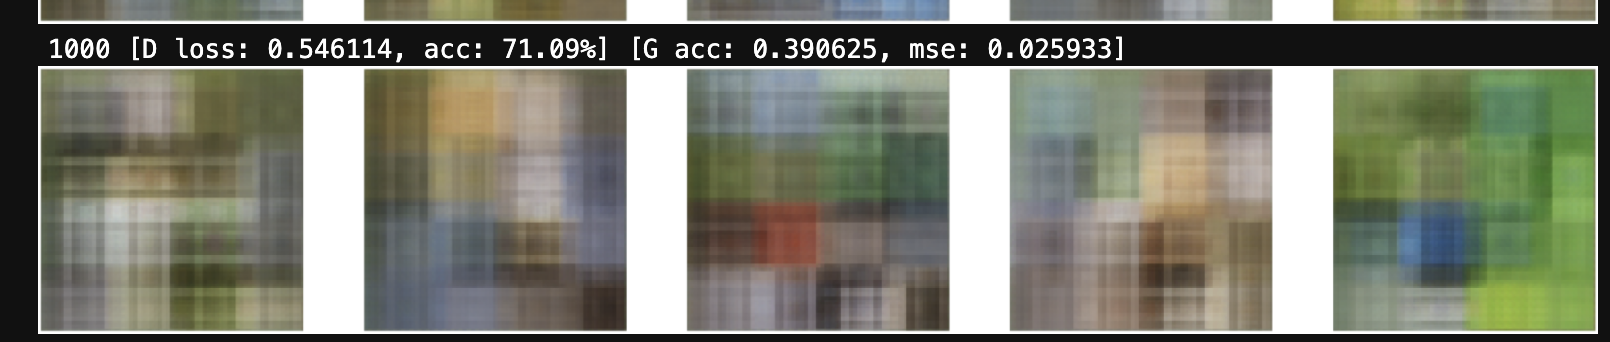
2. 2000 epoch

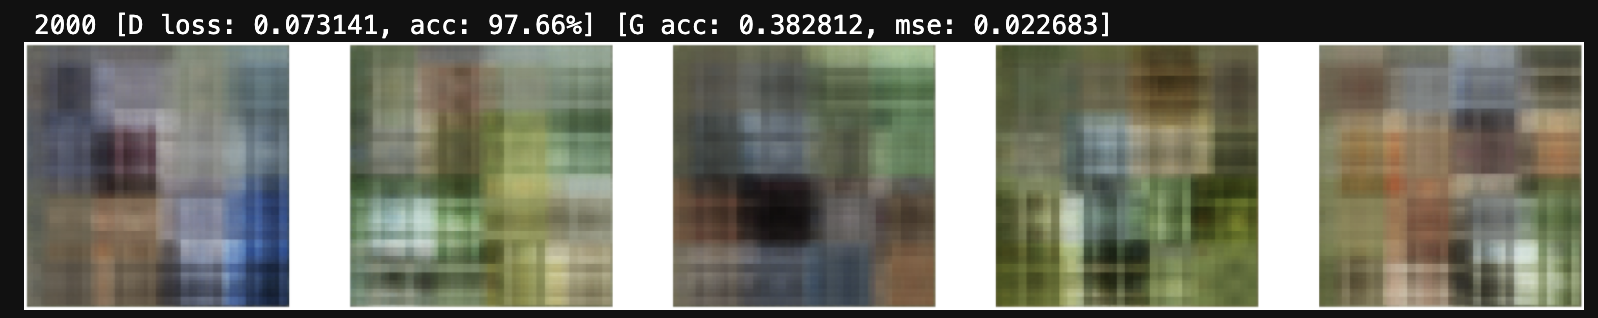
3. 3000 

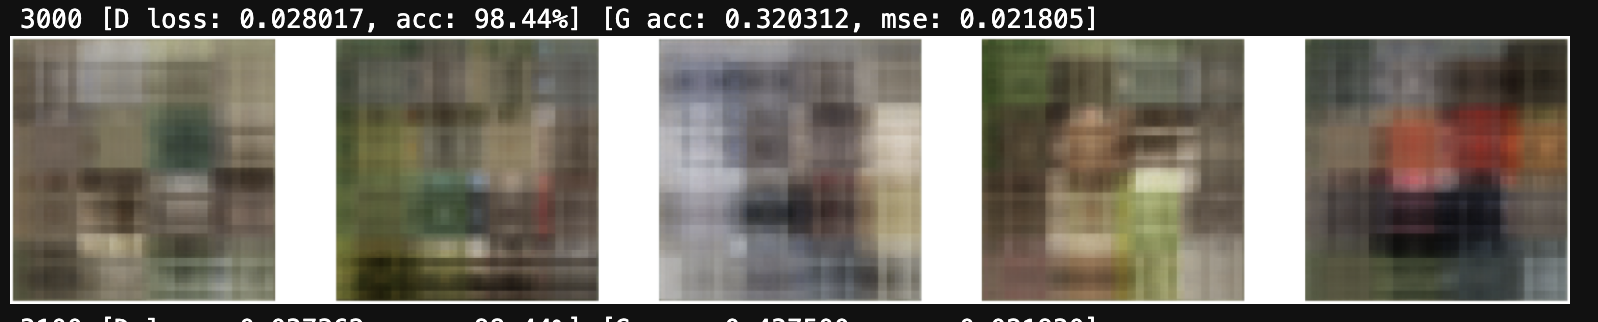
4. 4000

### Semi-Supervised AAE

1. The difference of input of discrminator between SSAAE and AAE
For SSAAE, the input combined with labels input, while no labels in discrminator input of AAE. 
This is because, SSAAE needs a small number fo labels to help improve classification.
```python
# SSAAE
discriminator = Model([latent_input, labels_input], outputs, name='discriminator')
# AAE

        discriminator = Model(latent_inputs, outputs, name='discriminator')

```
2. Differnce of distribution between SSAAE and AAE
Since there are some unlabeled records in target set in SSAAE. We need to seprarate labled from unlabeled, while in AAE all are normal distribution.
```python
# SSAAE
# unlabeled
y_train[idx_unlabel] = num_labels
## didstribution separation

            if y == num_labels:
                l = np.random.randint(0, num_labels)
            else:
                l = y


# AAE
# no separation
latent_real = 5*np.random.normal(size=(half_batch, self.encoded_dim))
```

3. Perforamnce 
The performance of SSAAE is not as good as expected, far behind AAE. We tried all the optimzation, but no too much effection. One of the reason we guess is the distribution function of SSAAE, generateRandomVectors, we didn't fully figure out the distribution equation, especiallly the magic number **8** and **.4**. So, probably these numbers only worked in their scenario

```python
    def generateRandomVectors(self, y_train):
        vectors = []
        labels = np.zeros((len(y_train), num_labels+1))

        labels[range(len(y_train)), np.array(y_train).astype(int)] = 1
        for index,y in enumerate(y_train):
            
            if y == num_labels:
                l = np.random.randint(0, num_labels)
            else:
                l = y
            mean = [num_labels*np.cos((l*latent_dim*np.pi)/num_labels), num_labels*np.sin((l*latent_dim*np.pi)/num_labels)]
            v1 = [np.cos((l*latent_dim*np.pi)/num_labels), np.sin((l*latent_dim*np.pi)/num_labels)]
            v2 = [-np.sin((l*latent_dim*np.pi)/num_labels), np.cos((l*latent_dim*np.pi)/num_labels)]
            ## magic number
            a1 = 8
            a2 = .4

```

### Screenshot
#### generated images
1. 1000 epoch

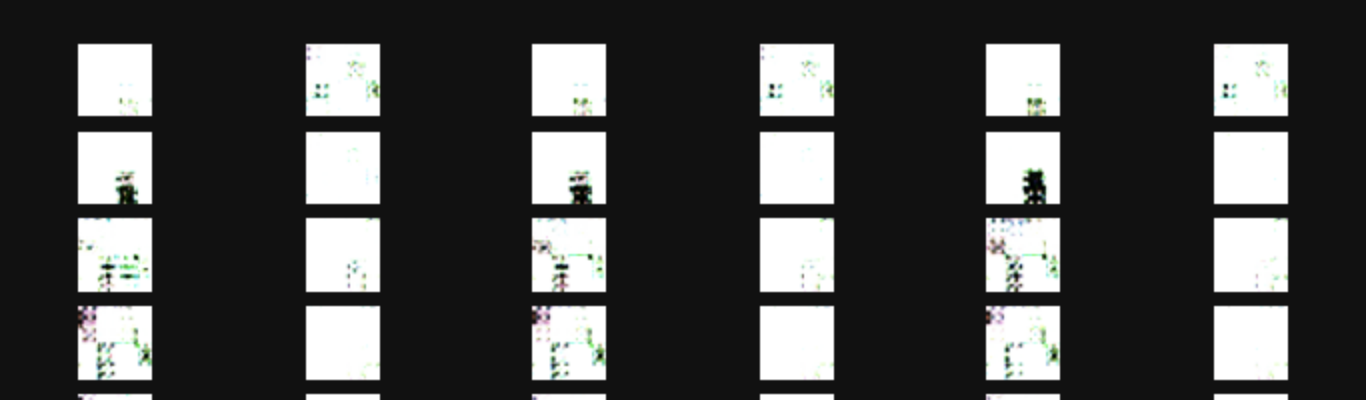
2. 2000 epoch

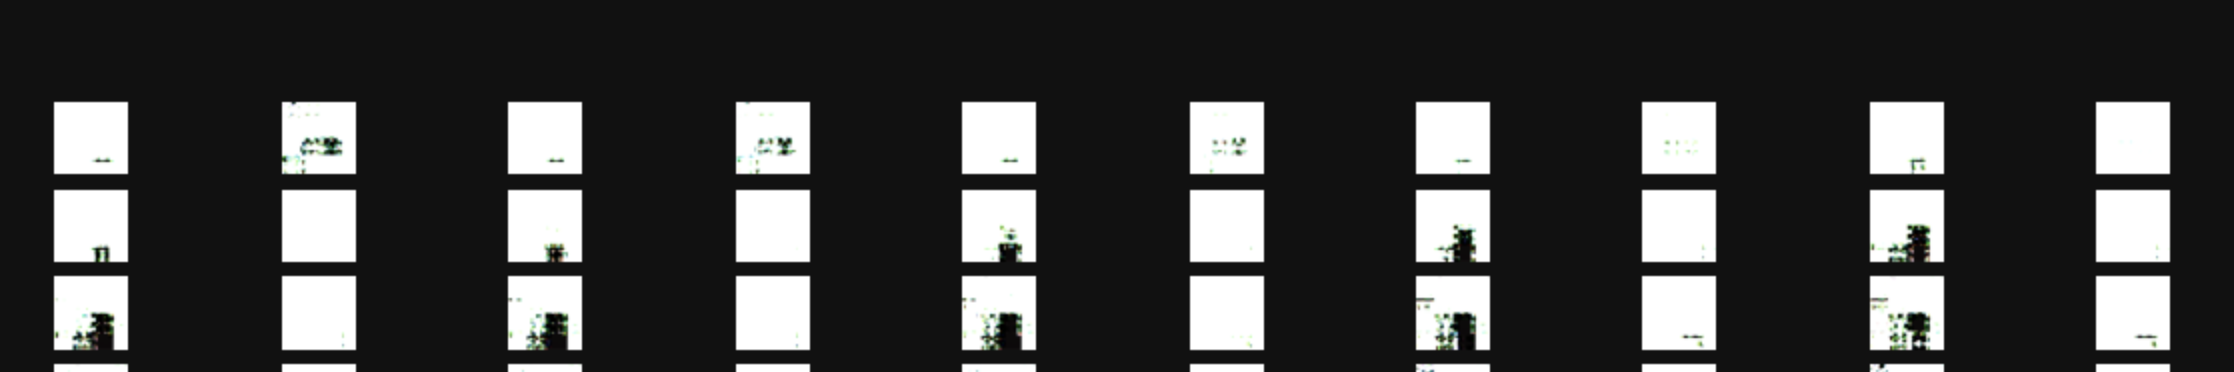

#### map
1. 1000 epochs

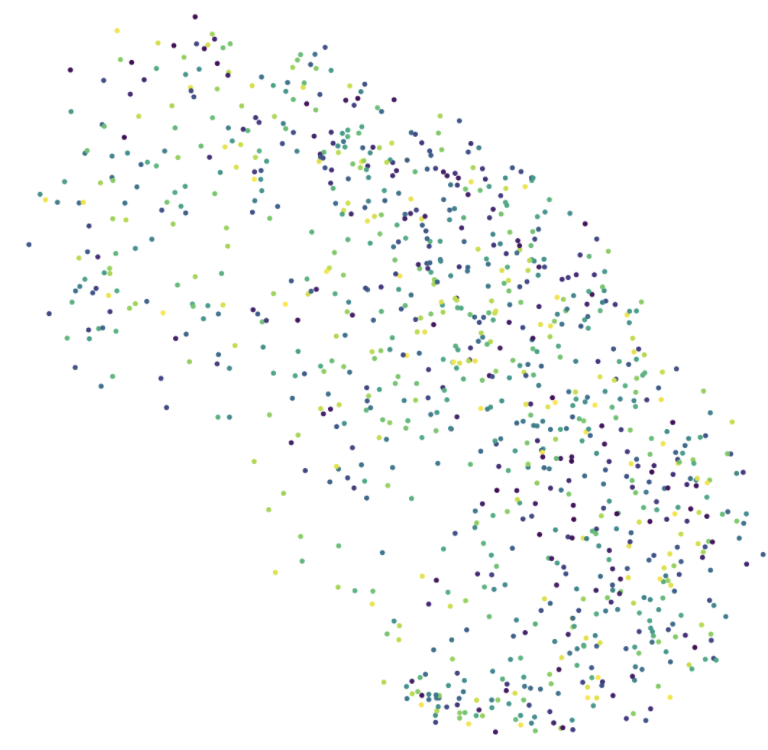
2. 2000 epochs

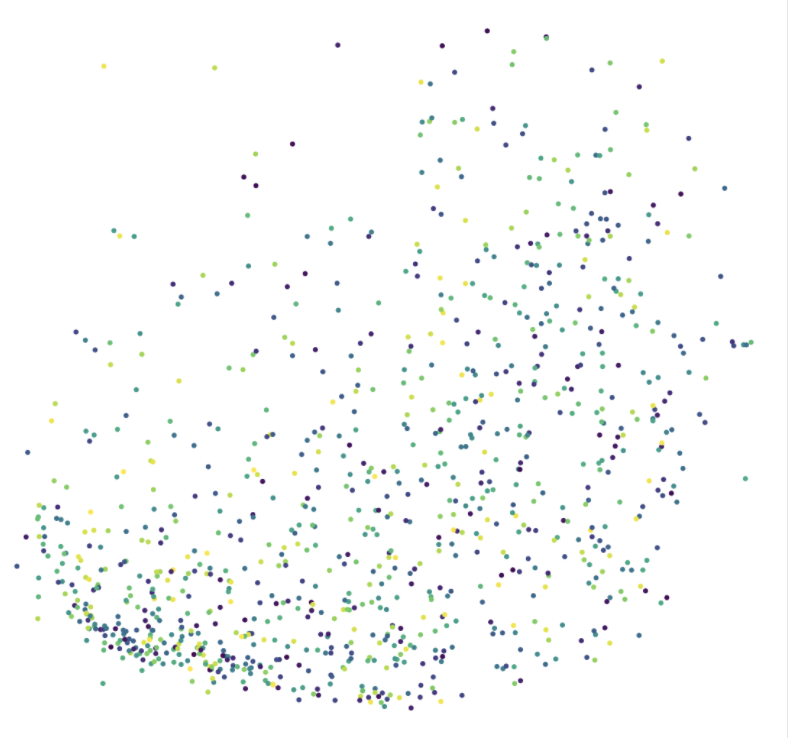

No need to list the rest since there are no improvement


In [ ]:
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
plt.ioff()
class SSAAE():
    def __init__(self, img_shape=input_shape, encoded_dim=latent_dim):
        self.encoded_dim = encoded_dim
        self.optimizer_reconst = Adam(0.0001)
        self.optimizer_discriminator = Adam(0.0001)
        self._initAndCompileFullModel(img_shape, encoded_dim)

    def _genEncoderModel(self, img_shape, encoded_dim):
        """ Build Encoder Model Based on Paper Configuration
        Args:
            img_shape (tuple) : shape of input image
            encoded_dim (int) : number of latent variables
        Return:
            A sequential keras model
        """
        input_shape = img_shape
        latent_dim = encoded_dim

        inputs = Input(shape=input_shape, name='encoder_input')
        x = inputs
        # stack of Conv2D(64)-Conv2D(128)-Conv2D(256)
        for filters in layer_filters:
            x = BatchNormalization()(x)
            x = Conv2D(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       activation='relu',
                       padding='same')(x)
            x = MaxPool2D()(x)

        # shape info needed to build decoder model so we don't do hand computation
        # the input to the decoder's first Conv2DTranspose will have this shape
        # shape is (4, 4, 256) which is processed by the decoder back to (32, 32, 3)
        self.shape = K.int_shape(x)

        # generate a latent vector
        x = Flatten()(x)
        x = BatchNormalization()(x)
        latent = Dense(latent_dim, name='latent_vector')(x)

        # instantiate encoder model
        encoder = Model(inputs, latent, name='encoder')
        encoder.summary()
        return encoder


    def _getDecoderModel(self, encoded_dim, img_shape):
        """ Build Decoder Model Based on Paper Configuration
        Args:
            encoded_dim (int) : number of latent variables
            img_shape (tuple) : shape of target images
        Return:
            A sequential keras model
        """
        latent_dim = encoded_dim
        shape = self.shape
        
        # build the decoder model
        latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
        x = Dense(shape[1]*shape[2]*shape[3])(latent_inputs)
        x = Reshape((shape[1], shape[2], shape[3]))(x)

#         x = BatchNormalization()(x)
        # stack of Conv2DTranspose(256)-Conv2DTranspose(128)-Conv2DTranspose(64)
        for filters in layer_filters[::-1]:
            x = BatchNormalization()(x)
            x = Conv2DTranspose(filters=filters,
                                kernel_size=kernel_size,
                                strides=2,
                                activation='relu',
                                padding='same')(x)
            x = UpSampling2D()(x)

        x = BatchNormalization()(x)
        outputs = Conv2DTranspose(filters=channels,
                                  kernel_size=kernel_size,
                                  activation='sigmoid',
                                  padding='same',
                                  name='decoder_output')(x)

        # instantiate decoder model
        decoder = Model(latent_inputs, outputs, name='decoder')
        decoder.summary()

        return decoder  
    
    def _getDescriminator(self, input_dim):
        """ Build Descriminator Model Based on Paper Configuration
        Args:
            input_dim (int) : number of latent variables
        Return:
            A sequential keras model
        """
        shape = self.shape

        # build the decoder model
        latent_input = Input(shape=(input_dim,), name='discriminator_input')
        labels_input = Input(shape=(num_labels + 1,))
        concated = concatenate([latent_input, labels_input])

        x = Dense(shape[1]*shape[2]*shape[3], kernel_initializer=initializer,
                          bias_initializer=initializer)(concated)
        x = Reshape((shape[1], shape[2], shape[3]))(x)
        
#         x = BatchNormalization()(x)
#         x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
#         x = MaxPooling2D(pool_size=2, strides=2)(x)
#         x = BatchNormalization()(x)
        x = Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(x)
        x = MaxPooling2D(pool_size=2, strides=2)(x)
        x = Flatten()(x)
#         x = BatchNormalization()(x)

        outputs = Dense(1, name='discriminator_output', activation='sigmoid',
                        kernel_initializer=initializer, bias_initializer=initializer)(x)

        
        # instantiate discriminator model
        discriminator = Model([latent_input, labels_input], outputs, name='discriminator')
        discriminator.summary()

        return discriminator

    def _initAndCompileFullModel(self, img_shape, encoded_dim):
        self.encoder = self._genEncoderModel(img_shape, encoded_dim)
        self.decoder = self._getDecoderModel(encoded_dim, img_shape)
        self.discriminator = self._getDescriminator(encoded_dim)
        img = Input(shape=img_shape)
        label_code = Input(shape=(num_labels+1,))
        encoded_repr = self.encoder(img)
        gen_img = self.decoder(encoded_repr)
        self.autoencoder = Model(img, gen_img)
        valid = self.discriminator([encoded_repr, label_code])
        self.encoder_discriminator = Model([img, label_code], valid)
        self.discriminator.compile(optimizer=self.optimizer_discriminator,
                                   loss='binary_crossentropy',
                                   metrics=['accuracy'])
        self.autoencoder.compile(optimizer=self.optimizer_reconst,
                                 loss ='mse')
        for layer in self.discriminator.layers:
            layer.trainable = False
        self.encoder_discriminator.compile(optimizer=self.optimizer_discriminator,
                                           loss='binary_crossentropy',
                                           metrics=['accuracy'])

    def imagegrid(self, epochnumber):
        fig = plt.figure(figsize=[20, 20])
        (latent, labels) = self.generateRandomVectors(range(num_labels))
        imgs = self.decoder.predict(latent)
        for index, img in enumerate(imgs):
            img = img.reshape(input_shape)
            ax = fig.add_subplot(num_labels//10, 10, index+1)
            ax.set_axis_off()
            ax.imshow(img, cmap="gray")
        fig.savefig("images/SSAAE/" + str(epochnumber)+".png")
        plt.show()
        plt.close(fig)
        
    def saveLatentMap(self,epochnumber, x_test, y_test):
        fig = plt.figure(figsize=[20, 20])
        lat = self.encoder.predict(x_test)
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(lat[:,0], lat[:,1], c=y_test)
        fig.savefig("images/SSAAE/map_"+ str(epochnumber)+".png")



    def train(self, x_train, y_train, x_test, y_test, batch_size=32, epochs=10000, save_interval=100):
        for epoch in range(epochs):
            #---------------Train Discriminator -------------
            # Select a random half batch of images
            idx = np.random.randint(0, x_train.shape[0], batch_size)
            imgs = x_train[idx]
            y_batch = y_train[idx]
            # Generate a half batch of new images
            latent_fake = self.encoder.predict(imgs)
            #gen_imgs = self.decoder.predict(latent_fake)
            #latent_real = np.random.normal(size=(half_batch, self.encoded_dim))
            (latent_real, labels) = self.generateRandomVectors(y_batch)
            valid = np.ones((batch_size, 1))
            fake = np.zeros((batch_size, 1))
            # Train the discriminator

            d_loss_real = self.discriminator.train_on_batch([latent_real, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([latent_fake, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            #idx = np.random.randint(0, x_train.shape[0], batch_size)
            #imgs = x_train[idx]
            #y_batch = y_train[idx]
            #(_, labels) = self.generateRandomVectors(y_batch)
            # Generator wants the discriminator to label the generated representations as valid
            valid_y = np.ones((batch_size, 1))

            # Train the autoencode reconstruction
            g_loss_reconstruction = self.autoencoder.train_on_batch(imgs, imgs)

            # Train generator
            g_logg_similarity = self.encoder_discriminator.train_on_batch([imgs, labels], valid_y)
            # Plot the progress
            if(epoch % save_interval == 0):
                print ("%d [D loss: %f, acc: %.2f%%] [G acc: %f, mse: %f]" % (epoch, d_loss[0], 100*d_loss[1],
                   g_logg_similarity[1], g_loss_reconstruction))
                self.imagegrid(epoch)
                self.saveLatentMap(epoch, x_test, y_test)

    def generateRandomVectors(self, y_train):
        vectors = []
        labels = np.zeros((len(y_train), num_labels+1))

        labels[range(len(y_train)), np.array(y_train).astype(int)] = 1
        for index,y in enumerate(y_train):
            
            if y == num_labels:
                l = np.random.randint(0, num_labels)
            else:
                l = y
            mean = [num_labels*np.cos((l*latent_dim*np.pi)/num_labels), num_labels*np.sin((l*latent_dim*np.pi)/num_labels)]
            v1 = [np.cos((l*latent_dim*np.pi)/num_labels), np.sin((l*latent_dim*np.pi)/num_labels)]
            v2 = [-np.sin((l*latent_dim*np.pi)/num_labels), np.cos((l*latent_dim*np.pi)/num_labels)]
            a1 = 8
            a2 = .4
            M =np.vstack((v1,v2)).T
            S = np.array([[a1, 0], [0, a2]])
            cov = np.dot(np.dot(M, S), np.linalg.inv(M))
            #cov = cov*cov.T
            vec = np.random.multivariate_normal(mean=mean, cov=cov,
                                                size=latent_dim//2)

#             vec = np.random.normal(loc=l, size=latent_dim)

            vectors.append(vec)
        return (np.array(vectors).reshape(-1, latent_dim), labels)

In [ ]:
idx_unlabel = np.random.randint(0, x_train.shape[0], 20)

# convert one hot to integer
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

y_train[idx_unlabel] = num_labels
x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.
ann = SSAAE()
#vecs,b = ann.generateRandomVectors(1000*range(10))
#plt.scatter(vecs[:,0], vecs[:,1])
ann.train(x_train, y_train, x_test, y_test, batch_size, epochs=num_epochs)
vecs,b = ann.generateRandomVectors(1000*range(num_labels))
generated=ann.decoder.predict(vecs)
print(generated.shape)
L= helpers.approximateLogLiklihood(generated, x_test)
print("Log Likelihood")
print(L)


### SAAE

#### Difference
1. Input of decoder
The input of decoder of SAAE should have labels and labels combined.
This heleps decoder to generate images as the labels instructed, that's why it is called supervised AAE

#### Perforamnce
SAAE worked best among the 3 AAE, the reason is apprant, since the training is assistant with labels, the model has the most inforamtion.

1. 1000 epochs

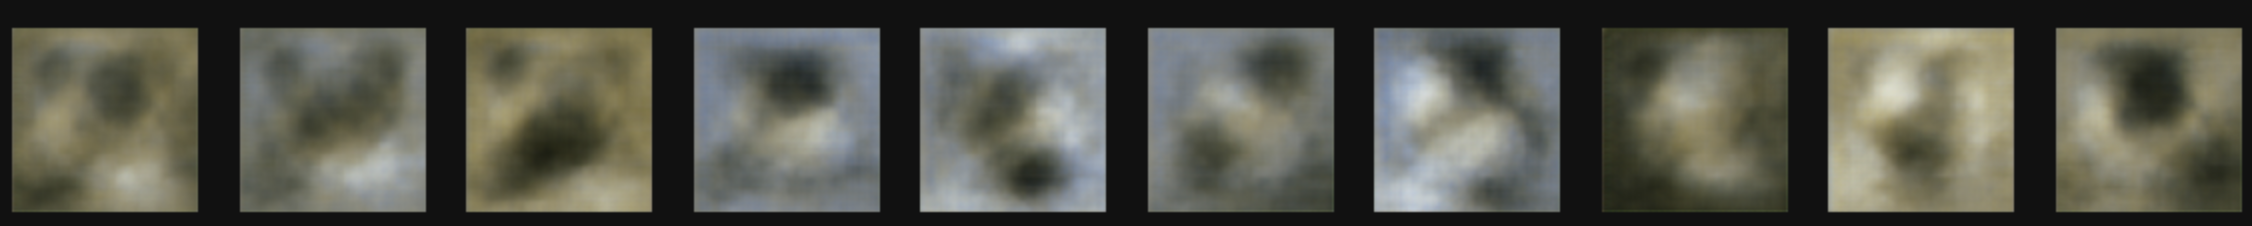

2. 2000 epochs

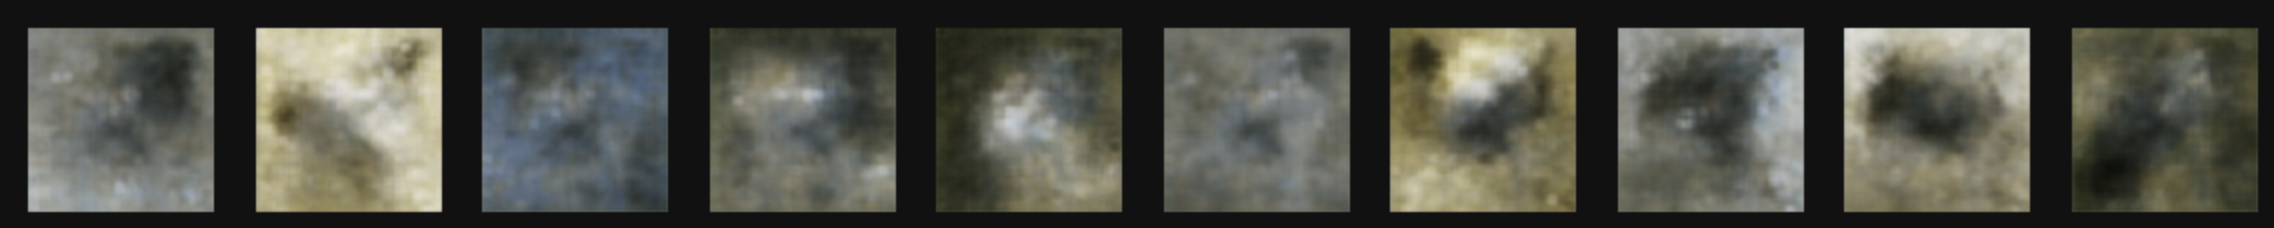

3. 3000 ephochs

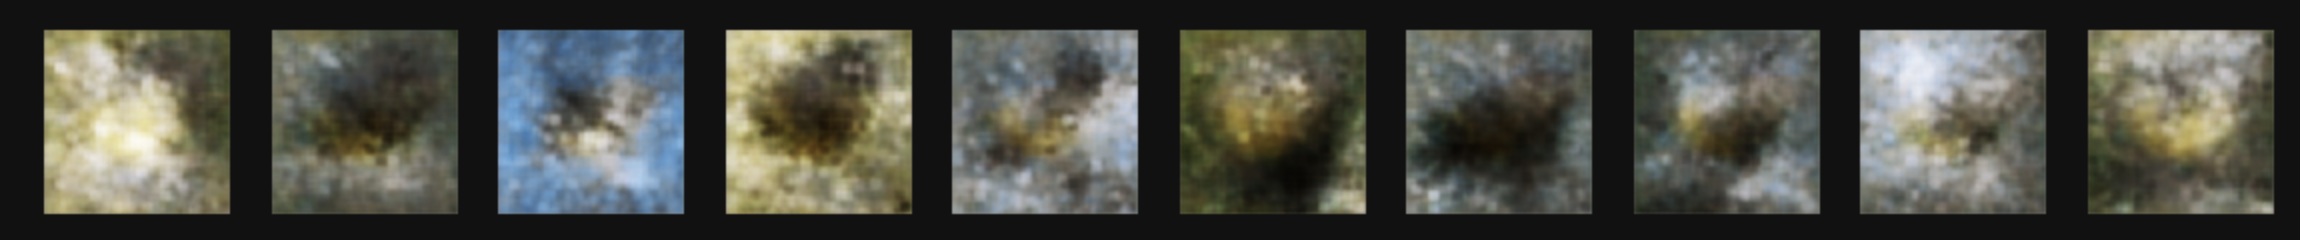

4. 4000
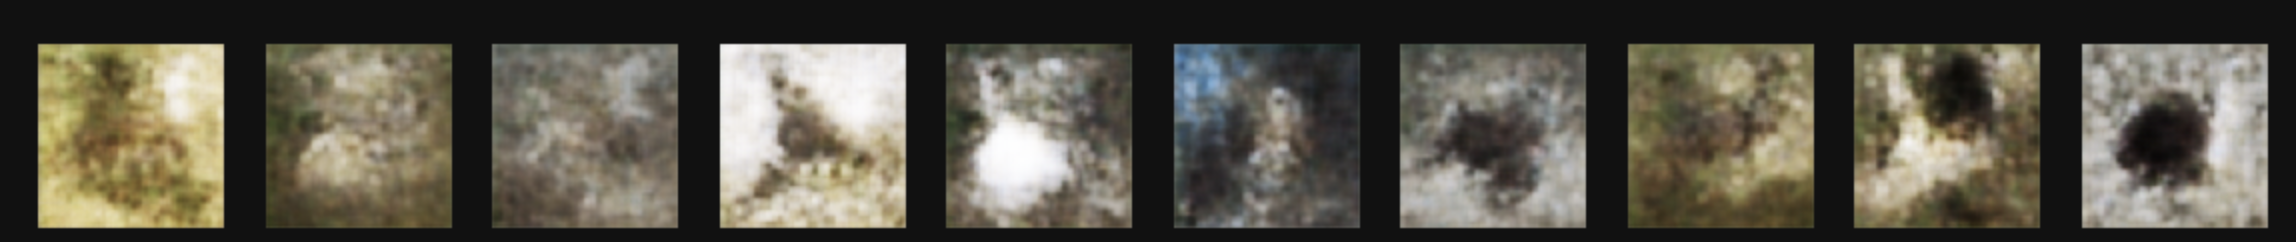

5. 5000

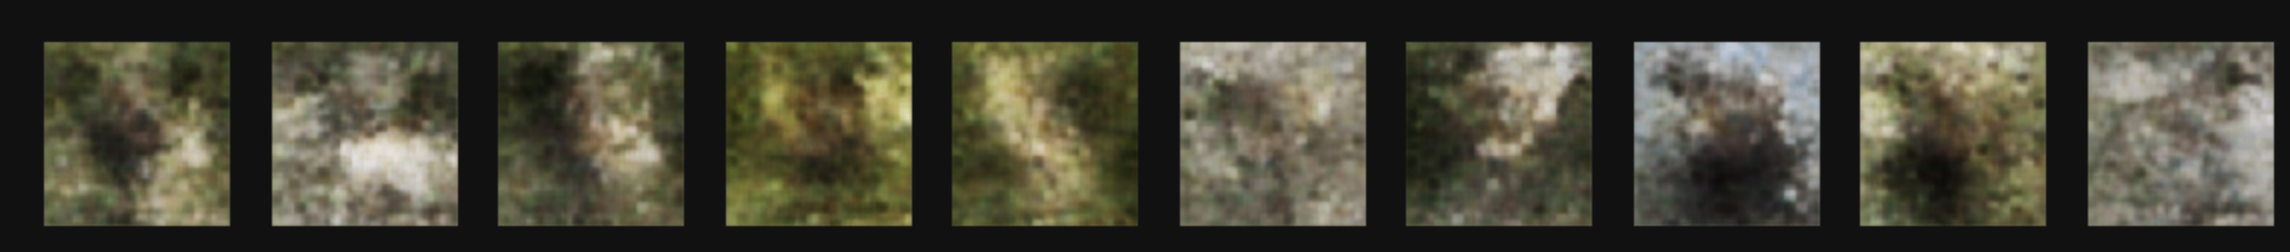


In [ ]:

## Implementation
lizer = RandomNormal(mean=0.0, stddev=0.01, seed=None)
from keras import backend as K

epochs=5000

img_rows = width
img_cols = width
channels = 3

# network parameters
input_shape = (img_rows, img_cols, channels)
batch_size = 128
kernel_size = 3
filters = 64
latent_dim = 256
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [16, 32, 64]


class SAAE():
    def __init__(self, img_shape=input_shape, encoded_dim=latent_dim):
        self.encoded_dim = encoded_dim
        self.optimizer_reconst = Adam(0.001)
        self.optimizer_discriminator = Adam(0.0001)
        self._initAndCompileFullModel(img_shape, encoded_dim)

    def _genEncoderModel(self, img_shape, encoded_dim):
        """ Build Encoder Model Based on Paper Configuration
        Args:
            img_shape (tuple) : shape of input image
            encoded_dim (int) : number of latent variables
        Return:
            A sequential keras model
        """
        input_shape = img_shape
        latent_dim = encoded_dim

        inputs = Input(shape=input_shape, name='encoder_input')
        x = inputs
        # stack of Conv2D(64)-Conv2D(128)-Conv2D(256)
        for filters in layer_filters:
            x = BatchNormalization()(x)
            x = Conv2D(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       activation='relu',
                       padding='same')(x)
            x = MaxPool2D()(x)

        # shape info needed to build decoder model so we don't do hand computation
        # the input to the decoder's first Conv2DTranspose will have this shape
        # shape is (4, 4, 256) which is processed by the decoder back to (32, 32, 3)
        self.shape = K.int_shape(x)

        # generate a latent vector
        x = Flatten()(x)
        x = BatchNormalization()(x)
        latent = Dense(latent_dim, name='latent_vector')(x)

        # instantiate encoder model
        encoder = Model(inputs, latent, name='encoder')
        encoder.summary()
        return encoder


    def _getDecoderModel(self, encoded_dim, img_shape):
        """ Build Decoder Model Based on Paper Configuration
        Args:
            encoded_dim (int) : number of latent variables
            img_shape (tuple) : shape of target images
        Return:
            A sequential keras model
        """
        latent_dim = encoded_dim
        shape = self.shape

        # build the decoder model
        latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
        labels_inputs = Input(shape=(num_labels,))
        concated = concatenate([latent_inputs, labels_inputs])
        x = Dense(shape[1] * shape[2] * shape[3])(concated)
        x = Reshape((shape[1], shape[2], shape[3]))(x)

        # stack of Conv2DTranspose(256)-Conv2DTranspose(128)-Conv2DTranspose(64)
        for filters in layer_filters[::-1]:
            x = BatchNormalization()(x)
            x = Conv2DTranspose(filters=filters,
                                kernel_size=kernel_size,
                                strides=2,
                                activation='relu',
                                padding='same')(x)
            x = UpSampling2D()(x)

        x = BatchNormalization()(x)
        outputs = Conv2DTranspose(filters=channels,
                                  kernel_size=kernel_size,
                                  activation='sigmoid',
                                  padding='same',
                                  name='decoder_output')(x)

        # instantiate decoder model
        decoder = Model([latent_inputs, labels_inputs], outputs, name='decoder')
        decoder.summary()

        return decoder

    def _getDescriminator(self, encoded_dim):
        """ Build Descriminator Model Based on Paper Configuration
        Args:
            encoded_dim (int) : number of latent variables
        Return:
            A sequential keras model
        """
        input_shape = encoded_dim
        shape = self.shape
        
        kernel_size = 5
        layer_filters = [32, 64, 128, 256]

        # build the decoder model
        latent_inputs = Input(shape=(latent_dim,), name='discriminator_input')
        x = Dense(shape[1]*shape[2]*shape[3], kernel_initializer=initializer,
                          bias_initializer=initializer)(latent_inputs)
        x = Reshape((shape[1], shape[2], shape[3]))(x)

        for filters in layer_filters:
            # first 3 convolution layers use strides = 2
            # last one uses strides = 1
            if filters == layer_filters[-1]:
                strides = 1
            else:
                strides = 2
            
            x = LeakyReLU(alpha=0.2)(x)
            x = Conv2D(filters=filters,
                       kernel_size=kernel_size,
                       strides=strides,
                       padding='same')(x)

        x = Flatten()(x)
        outputs = Dense(1, name='discriminator_output', activation='sigmoid', 
                        kernel_initializer=initializer, bias_initializer=initializer)(x)

        # instantiate discriminator model
        discriminator = Model(latent_inputs, outputs, name='discriminator')
        discriminator.summary()

        
        return discriminator  

    def _initAndCompileFullModel(self, img_shape, encoded_dim):
        self.encoder = self._genEncoderModel(img_shape, encoded_dim)
        self.decoder = self._getDecoderModel(encoded_dim, img_shape)
        self.discriminator = self._getDescriminator(encoded_dim)
        img = Input(shape=img_shape)
        label = Input(shape=(num_labels,))
        encoded_repr = self.encoder(img)
        gen_img = self.decoder([encoded_repr, label])
        self.autoencoder = Model([img, label], gen_img)
        valid = self.discriminator(encoded_repr)
        self.encoder_discriminator = Model(img, valid)
        self.discriminator.compile(optimizer=self.optimizer_discriminator,
                                   loss='binary_crossentropy',
                                   metrics=['accuracy'])
        self.autoencoder.compile(optimizer=self.optimizer_reconst,
                                 loss ='mse')
        for layer in self.discriminator.layers:
            layer.trainable = False
        self.encoder_discriminator.compile(optimizer=self.optimizer_discriminator,
                                           loss='binary_crossentropy',
                                           metrics=['accuracy'])
    def imagegrid(self, epochnumber):
        fig = plt.figure(figsize=[20, 20])
        labels = y_train
        styles = np.random.normal(size=(10, self.encoded_dim))
        k=0
        for label in labels[epochnumber//num_labels:epochnumber//num_labels+10]:
            for style in styles:
                img = self.decoder.predict([style.reshape(-1,self.encoded_dim), label.reshape(-1,num_labels)])
                img = img.reshape(input_shape)
                k = k + 1
                # 250 rows, 10 colums
                ax = fig.add_subplot(10, 10, k)
                ax.set_axis_off()
                ax.imshow(img, cmap="gray")
        fig.savefig("images/SAAE/" + str(epochnumber) + ".png")
        plt.show()
        plt.close(fig)


    def train(self, x_train, y_train, batch_size=32, epochs=5000, save_image_interval=100):
        labels = y_train
        for epoch in range(epochs):
            #---------------Train Discriminator -------------
            # Select a random half batch of images
            idx = np.random.randint(0, x_train.shape[0], batch_size)
            imgs = x_train[idx]
            labels_batch = labels[idx, :]
            # Generate a half batch of new images
            latent_fake = self.encoder.predict(imgs)
            #gen_imgs = self.decoder.predict(latent_fake)
            latent_real = np.random.normal(size=(batch_size, self.encoded_dim))
            valid = np.ones((batch_size, 1))
            fake = np.zeros((batch_size, 1))
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(latent_real, valid)
            d_loss_fake = self.discriminator.train_on_batch(latent_fake, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            #idx = np.random.randint(0, x_train.shape[0], batch_size)
            #imgs = x_train[idx]
            # Generator wants the discriminator to label the generated representations as valid
            valid_y = np.ones((batch_size, 1))

            # Train the autoencode reconstruction
            g_loss_reconstruction = self.autoencoder.train_on_batch([imgs, labels_batch], imgs)

            # Train generator
            g_logg_similarity = self.encoder_discriminator.train_on_batch(imgs, valid_y)
            # Plot the progress
            if(epoch % save_image_interval == 0):
                print ("%d [D loss: %f, acc: %.2f%%] [G acc: %f, mse: %f]" % (epoch, d_loss[0], 100*d_loss[1],
                   g_logg_similarity[1], g_loss_reconstruction))
                self.imagegrid(epoch)
                

In [ ]:

ann = SAAE()
ann.train(x_train, y_train, batch_size, epochs)
